In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style(style='darkgrid')

In [2]:
credit_card_df = pd.read_csv('creditcard.csv')

In [3]:
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_df.shape

(284807, 31)

In [5]:
credit_card_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [6]:
print('Number of null values:', credit_card_df.isna().sum().sum())
print('-'*50)
display(credit_card_df.info())

Number of null values: 0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float

None

In [7]:
print('-'*50)
print('Full DataFrame information:')
display(credit_card_df[['Amount', 'Time']].describe())
print('-'*50)
print('Information on all fraud transactions:')
display(credit_card_df[credit_card_df['Class'] == 1][['Amount', 'Time']].describe())

--------------------------------------------------
Full DataFrame information:


,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


--------------------------------------------------
Information on all fraud transactions:


,Amount,Time
count,492.000000,492.000000
mean,122.211321,80746.806911
std,256.683288,47835.365138
min,0.000000,406.000000
25%,1.000000,41241.500000
50%,9.250000,75568.500000
75%,105.890000,128483.000000
max,2125.870000,170348.000000


In [8]:
y = credit_card_df['Class']
X = credit_card_df.drop(y.name, axis=1)

In [9]:
print('Distribution of the dataset:')
display(y.value_counts())
print('-'*50)
print('Percent distribution of the dataset:')
y.value_counts(normalize=True)

Distribution of the dataset:


0    284315
1       492
Name: Class, dtype: int64

--------------------------------------------------
Percent distribution of the dataset:


0    0.998273
1    0.001727
Name: Class, dtype: float64

[{<ufunc 'sqrt'>: 2.8222631528102635}, {<ufunc 'cbrt'>: 1.495629316102277}, {<ufunc 'log1p'>: 0.1627029277416401}]


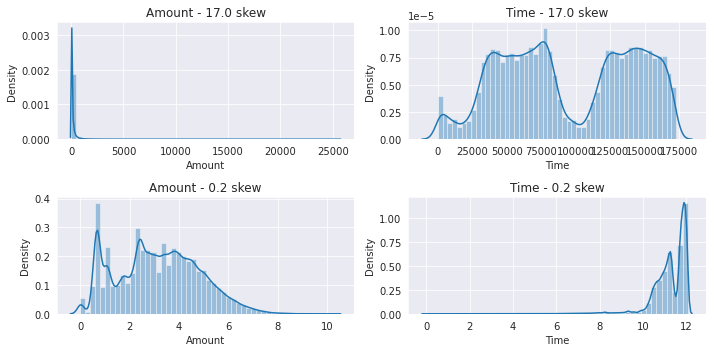

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=[10, 5])

chosen_columns = ['Amount', 'Time']

def plot_skew(X, columns, ax):
    for i, column in enumerate(columns):
        sns.distplot(X[column], ax=ax[i])\
            .set_title('{} - {:.1f} skew'.format(column, X['Amount'].skew()))


plot_skew(X, chosen_columns, ax1)

skews = [{trans: X['Amount'].apply(trans).skew()} for trans in [np.sqrt, np.cbrt, np.log1p]]
print(skews)

X_trans = X.copy()
X_trans[chosen_columns] = X_trans[chosen_columns].apply(np.log1p)

plot_skew(X_trans, chosen_columns, ax2)
plt.tight_layout()
plt.show()

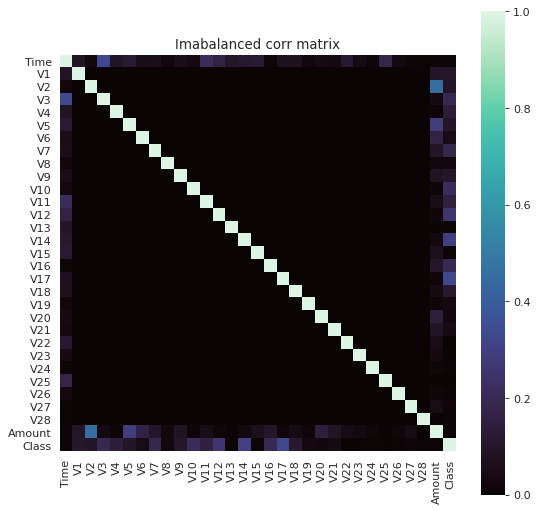

In [11]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(pd.concat([X_trans, y], axis=1).corr().abs(), square=True, cmap='mako').set_title('Imabalanced corr matrix')
plt.show()

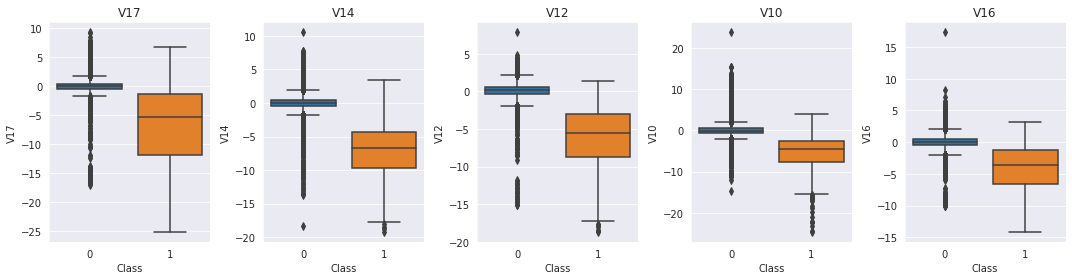

In [12]:
def corr_plot(df):
    corr_columns = [
        df.corr().abs()['Class'].sort_values(ascending=False).index[i] 
        for i in range(1, 6)]

    fig, ax = plt.subplots(ncols=len(corr_columns), figsize=[15, 4])

    [sns.boxplot(x='Class', y=column, data=df, ax=ax).set_title(column) for column, ax in zip(corr_columns, ax)]
    plt.tight_layout()
    plt.show()

corr_plot(credit_card_df)

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

target_count = credit_card_df['Class'].value_counts().sum()
sampling_ratio = {0: 4920-492, 1: 492}
X_resample_under, y_resample_under = RandomUnderSampler(sampling_strategy=sampling_ratio).fit_resample(X_trans, y)

In [14]:
print('Original shape of the DataFrame:', credit_card_df.drop('Class', axis=1).shape)
print('-'*50)
print('New shape of the DataFrame:', X_resample_under.shape)
print('-'*50)
print('Distribution of a new target class:')
display(y_resample_under.value_counts())

Original shape of the DataFrame: (284807, 30)
--------------------------------------------------
New shape of the DataFrame: (4920, 30)
--------------------------------------------------
Distribution of a new target class:


0    4428
1     492
Name: Class, dtype: int64

In [15]:
resampled_under_df = pd.concat([X_resample_under, y_resample_under], axis=1)

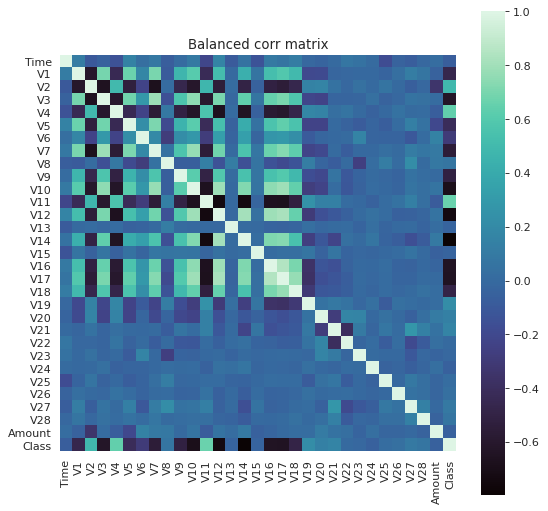

In [16]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(resampled_under_df.corr(), square=True, cmap='mako').set_title('Balanced corr matrix')
plt.show()

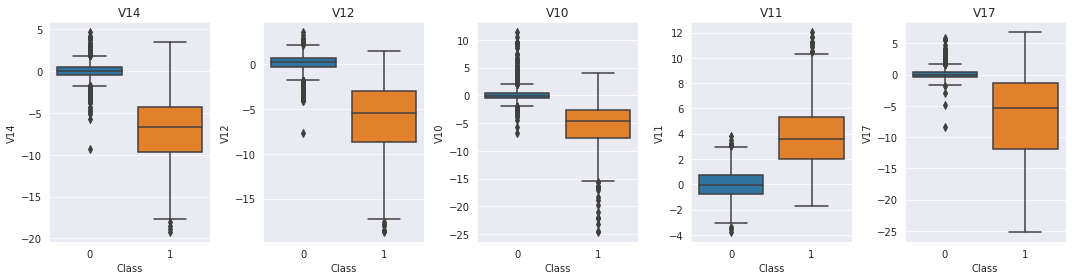

In [17]:
corr_plot(resampled_under_df)

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_resample_under)
X_resample_under_scaled = pd.DataFrame(scaler.transform(X_resample_under), index=X_resample_under.index, columns=X_resample_under.columns)

In [19]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_jobs=-1).fit_transform(X_resample_under_scaled)
X_tsne = pd.DataFrame(X_tsne, columns = ['TSNE1', 'TSNE2'])

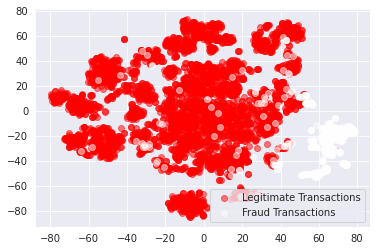

In [20]:
tsne_df = pd.concat([pd.DataFrame(X_tsne), y_resample_under], axis=1)
def tsne_plot(tsne_df, ax):
    legit = tsne_df[tsne_df['Class'] == 0]
    ax.scatter(legit['TSNE1'], legit['TSNE2'], label='Legitimate Transactions', alpha=0.5, c='red')
    fraud = tsne_df[tsne_df['Class'] == 1]
    ax.scatter(fraud['TSNE1'], fraud['TSNE2'], label='Fraud Transactions', alpha=0.5, c='white')
    plt.legend()
    plt.show()
    
tsne_plot(tsne_df, plt)

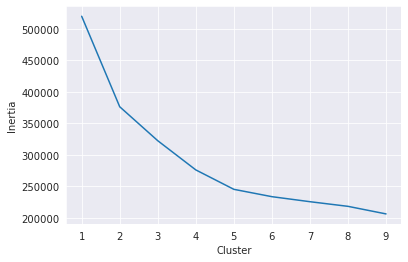

In [21]:
from sklearn.cluster import KMeans

inertia = []
clusters = range(1, 10)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_jobs=-1, random_state=42)
    kmeans.fit(X_resample_under_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(clusters, inertia)
plt.xlabel('Cluster'), plt.ylabel('Inertia')
plt.show()

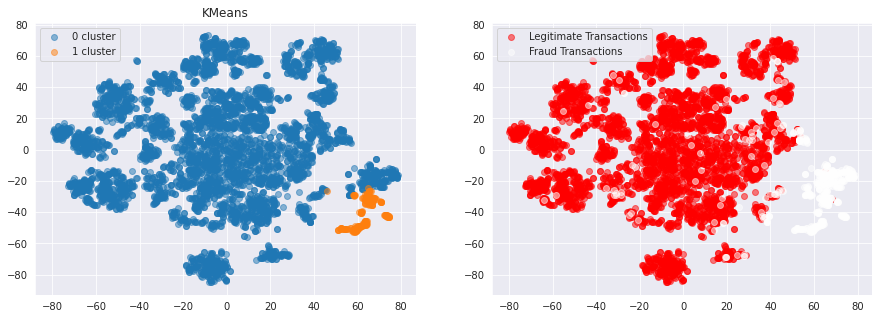

In [22]:
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

"""----------------Kmeans----------------"""
kmeans = KMeans(n_clusters=2, n_jobs=-1, random_state=42)
kmeans.fit(X_resample_under_scaled)
ax[0].set_title('KMeans')
tsne_df['KMeans'] = kmeans.labels_
for cluster in range(kmeans.labels_.min(), kmeans.labels_.max()+1):
    legit = tsne_df[tsne_df['KMeans'] == cluster]
    ax[0].scatter(legit['TSNE1'], legit['TSNE2'], label='{} cluster'.format(cluster), alpha=0.5)
ax[0].legend()

"""----------------Actual----------------"""
tsne_plot(tsne_df, ax[1])

plt.show()

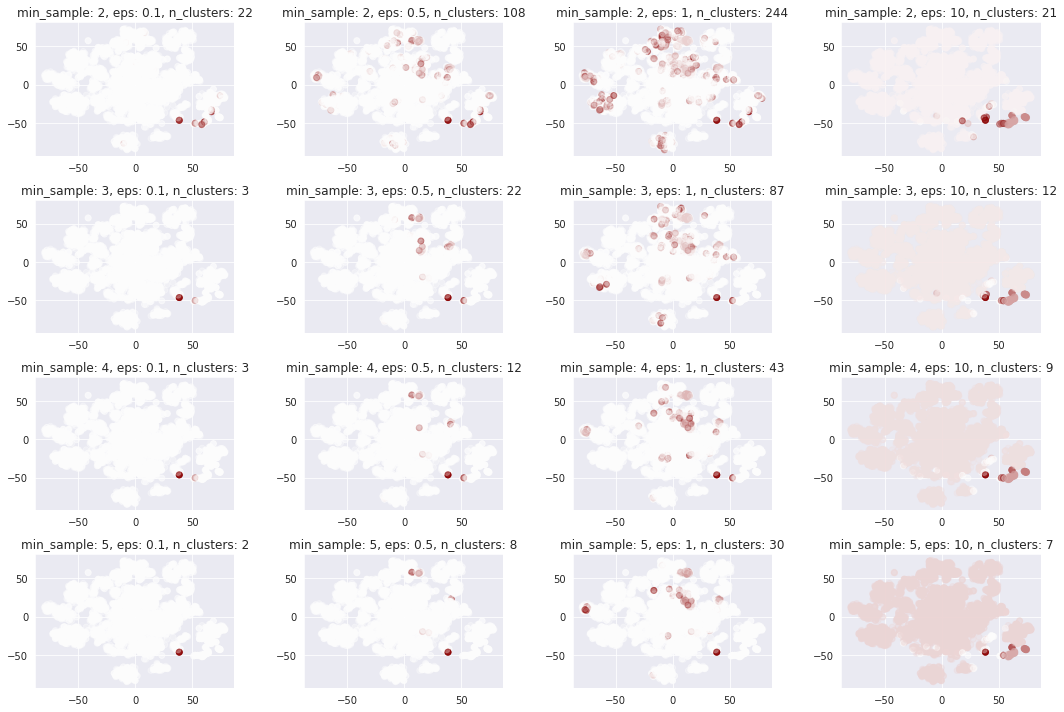

In [23]:
from sklearn.cluster import DBSCAN
import matplotlib as mpl

cmap = mpl.colors.LinearSegmentedColormap.from_list('white_to_red', ['white', 'darkred'])

epss = [0.1, 0.5, 1, 10]
min_samples = [2, 3, 4, 5]

fig, ax = plt.subplots(4, 4, figsize=[15, 10])

for row, min_sample in enumerate(min_samples):
    for column, eps in enumerate(epss):
        dbs = DBSCAN(n_jobs=-1, eps=eps, min_samples=min_sample)
        dbs.fit(X_resample_under_scaled)
        predicted_cluster = dbs.labels_
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('min_sample: {}, eps: {}, n_clusters: {}'.format(min_sample, eps, len(np.unique(dbs.labels_))))
        ax[row, column].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=predicted_cluster, cmap=cmap, alpha=0.3)

plt.tight_layout()
plt.show()

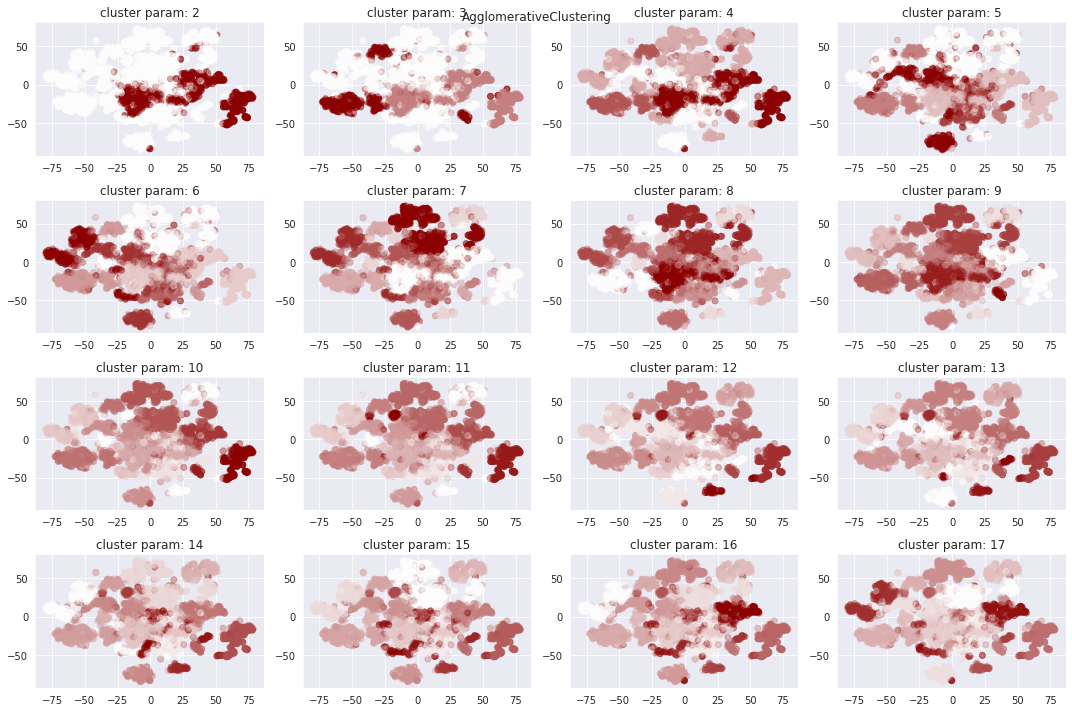

In [24]:
from sklearn.cluster import AgglomerativeClustering

fig, ax = plt.subplots(4, 4, figsize=[15, 10])
plt.suptitle('AgglomerativeClustering')
cluster = 2
for row in range(4):
    for column in range(4):
        agglo = AgglomerativeClustering(n_clusters=cluster, affinity='cosine', linkage='average')
        predicted_cluster = agglo.fit_predict(X_resample_under_scaled)
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('cluster param: {}'.format(cluster))
        ax[row, column].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=predicted_cluster, cmap=cmap, alpha=0.3)
        cluster+=1

plt.tight_layout()
plt.show()

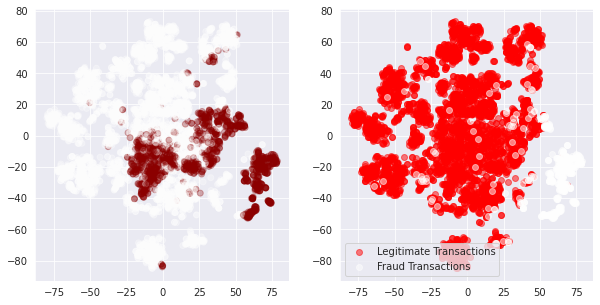

In [25]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])

"""---AgglomerativeClustering----"""
agglo = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
y_pred_algo = agglo.fit_predict(X_resample_under_scaled)
ax[0].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=y_pred_algo, cmap=cmap, alpha=0.3)

"""---Actual---"""
tsne_plot(tsne_df, ax[1])

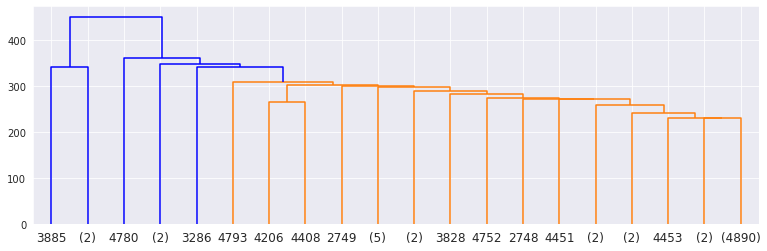

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, ax = plt.subplots(figsize=(13, 4))
Z = linkage(agglo.children_)
dendrogram(
    Z, 
    orientation='top', 
    p=20, 
    truncate_mode='lastp', 
    show_leaf_counts=True, 
    ax=ax, 
    above_threshold_color='blue')
plt.show()

In [27]:
X_val_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
y_val = y.copy()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def model_constructor(model, params, X_train, y_train, X_val, y_val):
    gs = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
    gs.fit(X_train, y_train)
    print('Best default score: ', gs.best_score_)
    print('-'*50)
    print('Best params: ', gs.best_params_)
    print('-'*50)
    y_pred = gs.predict(X_val)
    print('F1 score of minority target: ', f1_score(y_val, y_pred, average=None)[1])
    print('-'*50)
    print(classification_report(y_val, y_pred))
    print('-'*50)
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.show()
    return gs

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
params={
    'n_estimators': [100, 200, 400],
    'max_depth': [100, 200]
}

Results for not using any clustering method:
--------------------------------------------------
Best default score:  0.9839430894308944
--------------------------------------------------
Best params:  {'max_depth': 100, 'n_estimators': 100}
--------------------------------------------------
F1 score of minority target:  0.7187969924812029
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.57      0.97      0.72       492

    accuracy                           1.00    284807
   macro avg       0.79      0.99      0.86    284807
weighted avg       1.00      1.00      1.00    284807

--------------------------------------------------


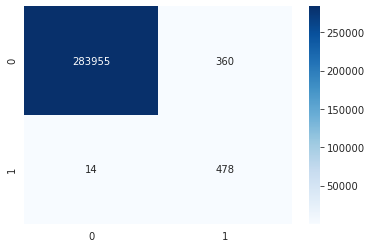

In [30]:
# Result of not using any clustering method sa a feature
print('Results for not using any clustering method:')
print('-'*50)
gs = model_constructor(forest, params, X_resample_under_scaled, y_resample_under, X_val_scaled, y_val)

Results for KMeans Clustering:
--------------------------------------------------
Best default score:  0.9821138211382113
--------------------------------------------------
Best params:  {'max_depth': 100, 'n_estimators': 400}
--------------------------------------------------
F1 score of minority target:  0.48648648648648657
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.81      0.35      0.49       492

    accuracy                           1.00    284807
   macro avg       0.90      0.67      0.74    284807
weighted avg       1.00      1.00      1.00    284807

--------------------------------------------------


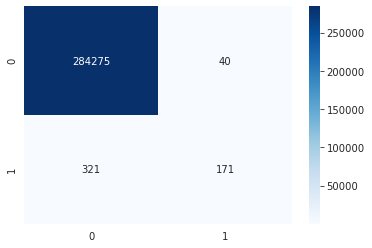

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'n_estimators': [100, 200, 400]})

In [31]:
# Result of using KMeans clustering as a feature
print('Results for KMeans Clustering:')
print('-'*50)
y_kmeans_train = kmeans.labels_
model_constructor(forest, params, X_resample_under_scaled, y_kmeans_train, X_val_scaled, y_val)

Results for AgglomerativeClustering:
--------------------------------------------------
Best default score:  0.9351626016260163
--------------------------------------------------
Best params:  {'max_depth': 200, 'n_estimators': 400}
--------------------------------------------------
F1 score of minority target:  0.016573644071407267
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    284315
           1       0.01      0.79      0.02       492

    accuracy                           0.84    284807
   macro avg       0.50      0.81      0.46    284807
weighted avg       1.00      0.84      0.91    284807

--------------------------------------------------


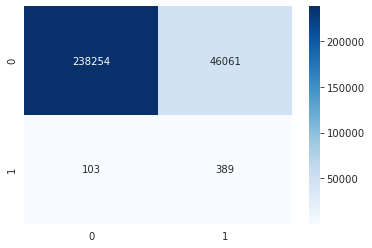

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'n_estimators': [100, 200, 400]})

In [32]:
# Result of using AgglomerativeClustering as a feature
print('Results for AgglomerativeClustering:')
print('-'*50)
model_constructor(forest, params, X_resample_under_scaled, y_pred_algo, X_val_scaled, y_val)

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit


class SupervisedUnsupervisedMix:
    def __init__(self, X, y, n_clusters, clustering_model, supervised_model):
        self.X = X
        self.y = y
        self.n_clusters = n_clusters
        self.clustering_model = clustering_model
        if self.clustering_model:
            self.clustering_model = clustering_model.set_params(**{'n_clusters': self.n_clusters})
        self.supervised_model = supervised_model
        self.clustering_df = self.X.copy()
        self.f1_list = None
    
    def clustering_column(self):
        """Adding clustering column to the origin DataFrame to analyze the potential improvements from it"""
        km_col = pd.Series(self.clustering_model.fit_predict(self.X))
        km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
        self.clustering_df = pd.concat([self.clustering_df, km_cols], axis=1)

    def avg_f1(self, number_of_splits):
        f1_list = []
        for i_train, i_test in StratifiedShuffleSplit(n_splits=number_of_splits).split(self.clustering_df, self.y):
            X_train, X_test = self.clustering_df.iloc[i_train], self.clustering_df.iloc[i_test]
            y_train, y_test = self.y.iloc[i_train], self.y.iloc[i_test]
            self.supervised_model.fit(X_train, y_train)
            y_pred = self.supervised_model.predict(X_test)
            f1_list.append(f1_score(y_test, y_pred, average=None)[1])
        return np.average(f1_list)
    
    def f1_list_constructer(self, number_of_splits):
        self.f1_list = [self.avg_f1(number_of_splits) for _ in range(2, self.n_clusters)]

    def plot_f1(self):
        fig, ax = plt.subplots(figsize=[5, 5])
        ax.plot(np.arange(2, self.n_clusters), self.f1_list)
        ax.set_title('{} + {}'.format(self.clustering_model, self.supervised_model))
        ax.set_xlabel('Number of clusters as features')
        ax.set_ylabel('Average F1 score of minority class over 10 iterations')
        plt.show()

In [47]:
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, None, None, forest)
average_f1 = model.avg_f1(5)
print('The F1 score for the minority is: {:.2f}'.format(average_f1))

The F1 score for the minority is: 0.92


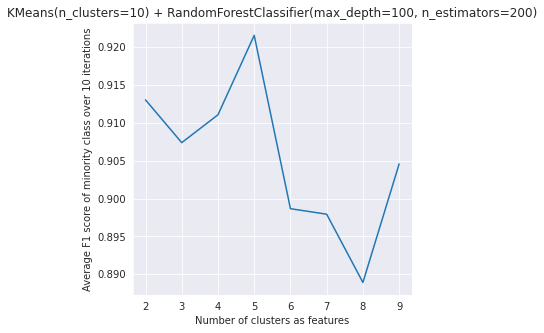

In [48]:
# KMeans 
kmeans = KMeans()
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, 10, kmeans, forest)
model.clustering_column()
model.f1_list_constructer(5)
model.plot_f1()

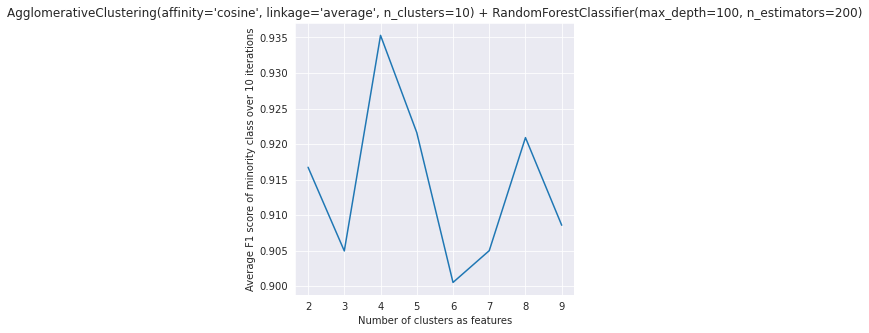

In [52]:
# AgglomerativeClustering 
agglo = AgglomerativeClustering().set_params(**{'affinity': 'cosine', 'linkage': 'average'})
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, 10, agglo, forest)
model.clustering_column()
model.f1_list_constructer(5)
model.plot_f1()